In [418]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sns.set_theme()



In [419]:
df = pd.read_csv('daily_data.csv')
df_hourly = pd.read_csv('hourly_price.csv')
df.head()

,HOURS,Uniswap Price,ETH Price,Sushi Price,CRV Price,Comp Price,wBTC Price,MKR Price,Yearn Price,1inch Price,Bancor Price
0,2022-04-01,11.189277,3263.761729,4.319491,2.631381,146.293898,45017.491570,2074.038054,22184.182583,1.736782,2.668758
1,2022-03-31,11.793010,3365.327289,4.674827,2.808429,155.948119,46679.670327,2161.333166,23472.396532,1.847503,2.761416
2,2022-03-30,11.464498,3390.221717,4.264350,2.809952,153.393302,47233.064573,2177.670003,23690.914105,1.809266,2.761471
3,2022-03-29,11.257411,3407.582747,4.094614,2.755311,139.838482,47549.373834,2119.625108,22832.193992,1.794972,2.770153
4,2022-03-28,11.375586,3345.698552,4.016576,2.650515,129.144098,47289.012855,2111.973064,22967.574919,1.786584,2.751937


In [420]:
df['Uniswap %'] = df['Uniswap Price'].pct_change(-1)
df['ETH %'] = df['ETH Price'].pct_change(-1)
df['Sushi %'] = df['Sushi Price'].pct_change(-1)
df['CRV %'] = df['CRV Price'].pct_change(-1)
df['Comp %'] = df['Comp Price'].pct_change(-1)
df['wBTC %'] = df['wBTC Price'].pct_change(-1)
df['MKR %'] = df['MKR Price'].pct_change(-1)
df['Yearn %'] = df['Yearn Price'].pct_change(-1)
df['1inch %'] = df['1inch Price'].pct_change(-1)
df['Bancor %'] = df['Bancor Price'].pct_change(-1)

Text(0.5, 1.0, 'Correlation Between Various ETH,BTC, and DEFI Tokens')

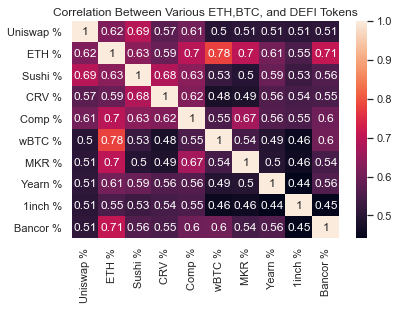

In [421]:
df_percent = df.iloc[:,11:].corr()
sns.heatmap(df_percent,annot = True)
plt.title('Correlation Between Various ETH,BTC, and DEFI Tokens')

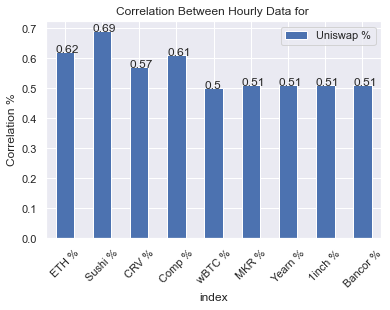

In [422]:
df_percent1 = df_percent.reset_index().iloc[1:,:]
df_percent1 = df_percent1.round(2)
ax = df_percent1.plot.bar(x='index', y='Uniswap %', rot=45)
plt.title('Correlation Between Hourly Data for ')
plt.ylabel('Correlation %')
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

Text(0.5, 1.0, 'Correlation Between Various ETH,BTC, and DEFI Tokens in the past 90 days')

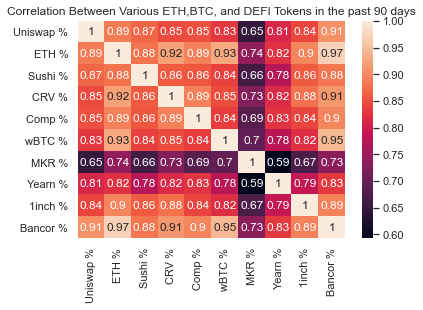

In [423]:
df_percent = df.iloc[0:90,11:].corr()
sns.heatmap(df_percent,annot = True)
plt.title('Correlation Between Various ETH,BTC, and DEFI Tokens in the past 90 days')

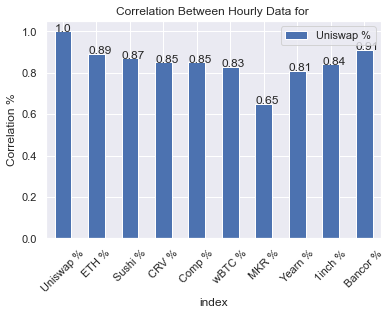

In [424]:
df_percent1 = df_percent.reset_index().iloc[:,:]
df_percent1 = df_percent1.round(2)
ax = df_percent1.plot.bar(x='index', y='Uniswap %', rot=45)
plt.title('Correlation Between Hourly Data for ')
plt.ylabel('Correlation %')
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

Text(0.5, 1.0, 'Correlation between Uniswap and ETH')

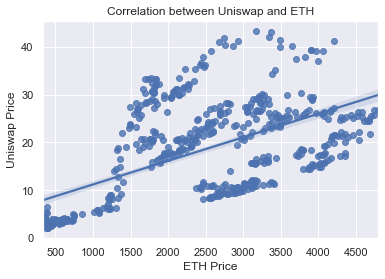

In [425]:
sns.regplot(x="ETH Price", y="Uniswap Price", data=df)
plt.title('Correlation between Uniswap and ETH')

Text(0.5, 1.0, 'Correlation between BTC and ETH')

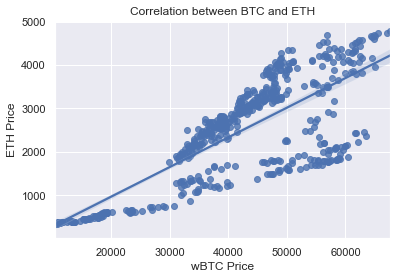

In [426]:
sns.regplot(x="wBTC Price", y="ETH Price", data=df);
plt.title('Correlation between BTC and ETH')

In [427]:
ss =MinMaxScaler()
data = df
#data[['ETH Price','Uniswap Price']] = ss.fit_transform(df[['ETH Price','Uniswap Price']])
X_train, X_test, y_train, y_test = train_test_split(df['ETH Price'],df['Uniswap Price'],random_state = 69)

In [428]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

RMSE: 8.33
R2: 0.41


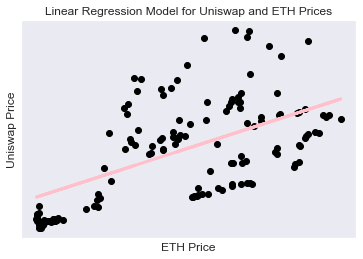

In [429]:
# Make predictions using the testing set
y_pred = lr.predict(X_test.values.reshape(-1,1))

# The coefficients
#print("Coefficients: \n", lr.coef_)
# The mean squared error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("R2: %.2f" % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="pink", linewidth=3)
plt.title('Linear Regression Model for Uniswap and ETH Prices')

plt.xticks(())
plt.ylabel('Uniswap Price')
plt.xlabel('ETH Price')
plt.yticks(())

plt.show()
df_projections = pd.DataFrame({"ETH Price Projections": [5000,10000,15000,20000]})
uniswap_prices= lr.predict(df_projections['ETH Price Projections'].values.reshape(-1,1))
df_projections['Uniswap Projections'] = uniswap_prices

In [430]:
df_projections

,ETH Price Projections,Uniswap Projections
0,5000,30.542098
1,10000,54.278788
2,15000,78.015477
3,20000,101.752167
